<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDA0321ENSkillsNetwork928-2023-01-01">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Exploratory Data Analysis Lab**


Estimated time needed: **30** minutes


In this module you get to work with the cleaned dataset from the previous module.

In this assignment you will perform the task of exploratory data analysis.
You will find out the distribution of data, presence of outliers and also determine the correlation between different columns in the dataset.


## Objectives


In this lab you will perform the following:


-   Identify the distribution of data in the dataset.

-   Identify outliers in the dataset.

-   Remove outliers from the dataset.

-   Identify correlation between features in the dataset.


* * *


## Hands on Lab


Import the pandas module.


In [4]:
import pandas as pd
import matplotlib.pyplot as plt

Load the dataset into a dataframe.


In [3]:
df = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m2_survey_data.csv")

## Distribution


### Determine how the data is distributed


The column `ConvertedComp` contains Salary converted to annual USD salaries using the exchange rate on 2019-02-01.

This assumes 12 working months and 50 working weeks.


Plot the distribution curve for the column `ConvertedComp`.


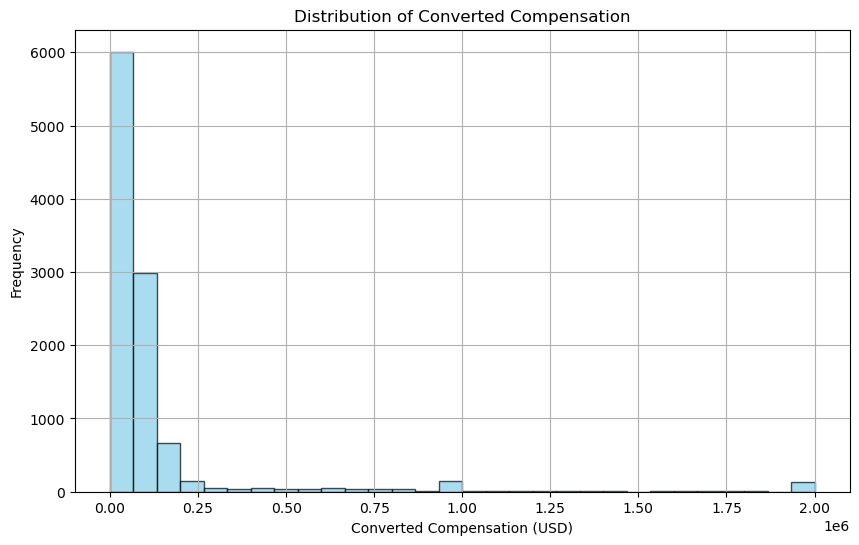

In [5]:
# your code goes here
# Plot the distribution curve for the column 'ConvertedComp'
plt.figure(figsize=(10, 6))
plt.hist(df['ConvertedComp'].dropna(), bins=30, color='skyblue', edgecolor='black', alpha=0.7)
plt.title('Distribution of Converted Compensation')
plt.xlabel('Converted Compensation (USD)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

Plot the histogram for the column `ConvertedComp`.


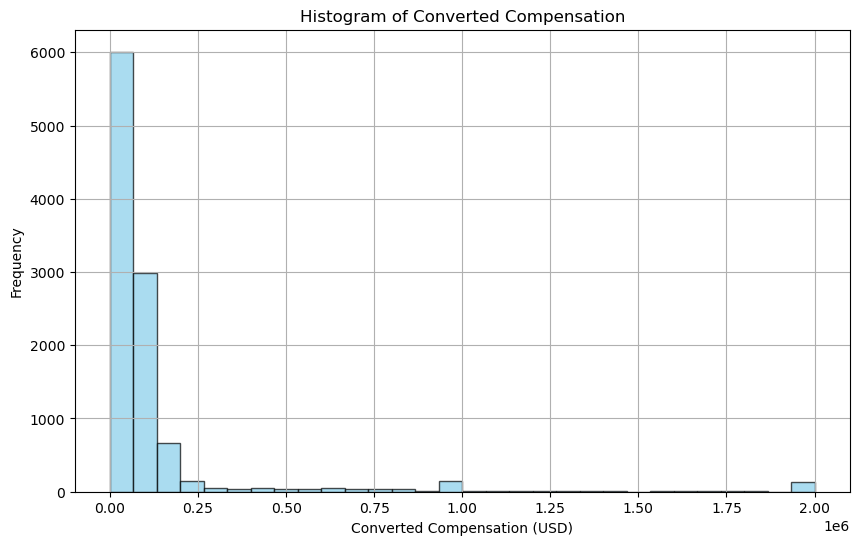

In [6]:
# Plot the histogram for the column 'ConvertedComp'
plt.figure(figsize=(10, 6))
plt.hist(df['ConvertedComp'].dropna(), bins=30, color='skyblue', edgecolor='black', alpha=0.7)
plt.title('Histogram of Converted Compensation')
plt.xlabel('Converted Compensation (USD)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


What is the median of the column `ConvertedComp`?


In [7]:
# your code goes here
median_converted_comp = df['ConvertedComp'].median()

print("Median of the column 'ConvertedComp':", median_converted_comp)

Median of the column 'ConvertedComp': 57745.0


How many responders identified themselves only as a **Man**?


In [8]:
# your code goes here
num_man_only = df[df['Gender'] == 'Man'].shape[0]

print("Number of responders who identified themselves only as a Man:", num_man_only)

Number of responders who identified themselves only as a Man: 10480


Find out the  median ConvertedComp of responders identified themselves only as a **Woman**?


In [9]:
# Filter the DataFrame for responders identified as Woman
woman_responses = df[df['Gender'] == 'Woman']

# Calculate the median ConvertedComp for responders identified as Woman
median_converted_comp_woman = woman_responses['ConvertedComp'].median()

print("Median ConvertedComp of responders identified themselves only as a Woman:", median_converted_comp_woman)

Median ConvertedComp of responders identified themselves only as a Woman: 57708.0


Give the five number summary for the column `Age`?


**Double click here for hint**.

<!--
min,q1,median,q3,max of a column are its five number summary.
-->


In [10]:
# your code goes here
# Calculate the five-number summary for the column 'Age'
five_num_summary_age = df['Age'].describe(percentiles=[.25, .5, .75])

print("Five-number summary for the column 'Age':")
print(five_num_summary_age[['min', '25%', '50%', '75%', 'max']])

Five-number summary for the column 'Age':
min    16.0
25%    25.0
50%    29.0
75%    35.0
max    99.0
Name: Age, dtype: float64


Plot a histogram of the column `Age`.


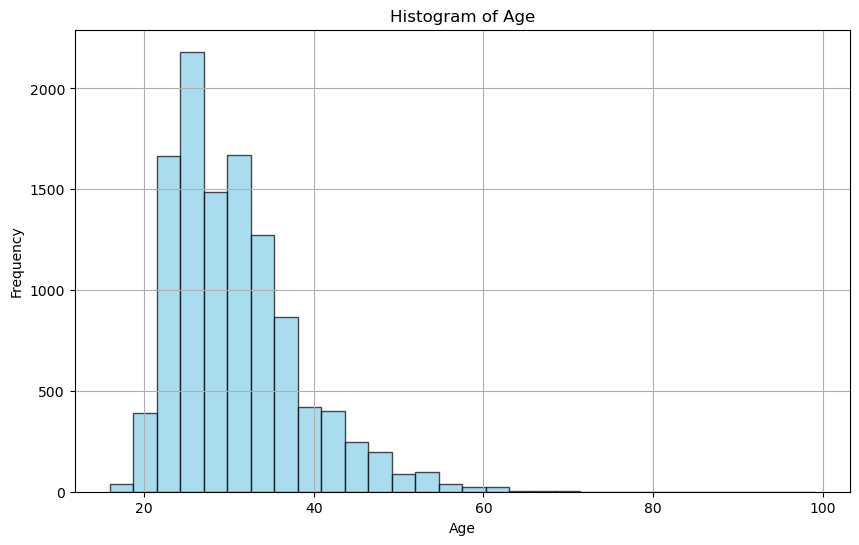

In [11]:
# Plot a histogram of the column 'Age'
plt.figure(figsize=(10, 6))
plt.hist(df['Age'].dropna(), bins=30, color='skyblue', edgecolor='black', alpha=0.7)
plt.title('Histogram of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

## Outliers


### Finding outliers


Find out if outliers exist in the column `ConvertedComp` using a box plot?


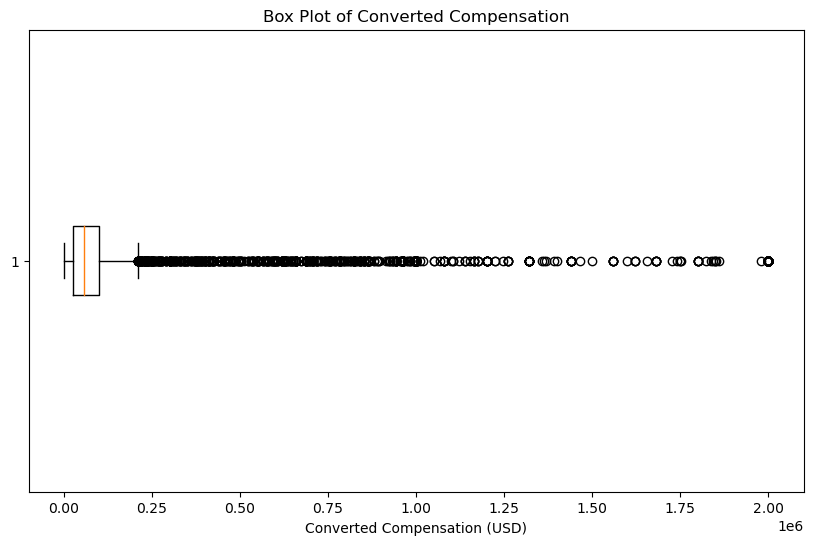

In [14]:
# your code goes here
# Create a box plot for the column 'ConvertedComp'
plt.figure(figsize=(10, 6))
plt.boxplot(df['ConvertedComp'].dropna(), vert=False)
plt.title('Box Plot of Converted Compensation')
plt.xlabel('Converted Compensation (USD)')
plt.show()

Find out the Inter Quartile Range for the column `ConvertedComp`.


In [15]:
# your code goes here
# Calculate the first quartile (Q1) and third quartile (Q3) of the column 'ConvertedComp'
Q1 = df['ConvertedComp'].quantile(0.25)
Q3 = df['ConvertedComp'].quantile(0.75)

# Calculate the interquartile range (IQR)
IQR = Q3 - Q1

print("Interquartile Range for 'ConvertedComp':", IQR)

Interquartile Range for 'ConvertedComp': 73132.0


Find out the upper and lower bounds.


In [16]:
# your code goes here
upper_bound = Q3 + 1.5 * IQR
lower_bound = Q1 - 1.5 * IQR

print("Upper bound for outliers:", upper_bound)
print("Lower bound for outliers:", lower_bound)

Upper bound for outliers: 209698.0
Lower bound for outliers: -82830.0


Identify how many outliers are there in the `ConvertedComp` column.


In [17]:
# Count the number of outliers in the column 'ConvertedComp'
num_outliers = df[(df['ConvertedComp'] < lower_bound) | (df['ConvertedComp'] > upper_bound)].shape[0]

print("Number of outliers in the 'ConvertedComp' column:", num_outliers)


Number of outliers in the 'ConvertedComp' column: 879


Create a new dataframe by removing the outliers from the `ConvertedComp` column.


In [18]:
# your code goes here
# Filter the original DataFrame to remove outliers from the 'ConvertedComp' column
df_no_outliers = df[(df['ConvertedComp'] >= lower_bound) & (df['ConvertedComp'] <= upper_bound)]

# Display the first few rows of the new DataFrame
print(df_no_outliers.head())

   Respondent                      MainBranch Hobbyist  \
0           4  I am a developer by profession       No   
1           9  I am a developer by profession      Yes   
2          13  I am a developer by profession      Yes   
4          17  I am a developer by profession      Yes   
5          19  I am a developer by profession      Yes   

                                         OpenSourcer  \
0                                              Never   
1                         Once a month or more often   
2  Less than once a month but more than once per ...   
4  Less than once a month but more than once per ...   
5                                              Never   

                                          OpenSource          Employment  \
0  The quality of OSS and closed source software ...  Employed full-time   
1  The quality of OSS and closed source software ...  Employed full-time   
2  OSS is, on average, of HIGHER quality than pro...  Employed full-time   
4  The qua

## Correlation


### Finding correlation


Find the correlation between `Age` and all other numerical columns.


In [20]:
# Calculate the correlation between 'Age' and all other numerical columns
correlation = df.corr()['Age']

# Print the correlation values
print(correlation)

Respondent       0.004041
CompTotal        0.006970
ConvertedComp    0.105386
WorkWeekHrs      0.036518
CodeRevHrs      -0.020469
Age              1.000000
Name: Age, dtype: float64


## Authors


Ramesh Sannareddy


### Other Contributors


Rav Ahuja


## Change Log


| Date (YYYY-MM-DD) | Version | Changed By        | Change Description                 |
| ----------------- | ------- | ----------------- | ---------------------------------- |
| 2020-10-17        | 0.1     | Ramesh Sannareddy | Created initial version of the lab |


 Copyright © 2020 IBM Corporation. This notebook and its source code are released under the terms of the [MIT License](https://cognitiveclass.ai/mit-license?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDA0321ENSkillsNetwork928-2023-01-01&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ).
